In [2]:
import pandas as pd
df = pd.read_csv('cGAS_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4103560,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12,19000.0,inactive
1,CHEMBL4085628,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,69000.0,inactive
2,CHEMBL577784,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,60.0,active
3,CHEMBL4096573,O=C(N[C@H]1CCCC[C@H]1C(=O)O)c1cnn2c(O)cc(-c3cc...,4900.0,intermediate
4,CHEMBL4084664,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,17500.0,inactive
...,...,...,...,...
369,CHEMBL5203275,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21,30.0,active
370,CHEMBL5205793,O=C(Nc1ccc(Cl)cn1)c1[nH]ncc1[N+](=O)[O-],2080.0,intermediate
371,CHEMBL5179510,COCC(=O)N1CCc2[nH]c3c(Cl)cc(Cl)cc3c2C1,1040.0,intermediate
372,CHEMBL5174318,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...,14.0,active


In [3]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL4103560,19000.0,inactive,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12
1,CHEMBL4085628,69000.0,inactive,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12
2,CHEMBL577784,60.0,active,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...
3,CHEMBL4096573,4900.0,intermediate,O=C(N[C@H]1CCCC[C@H]1C(=O)O)c1cnn2c(O)cc(-c3cc...
4,CHEMBL4084664,17500.0,inactive,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12
...,...,...,...,...
369,CHEMBL5203275,30.0,active,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21
370,CHEMBL5205793,2080.0,intermediate,O=C(Nc1ccc(Cl)cn1)c1[nH]ncc1[N+](=O)[O-]
371,CHEMBL5179510,1040.0,intermediate,COCC(=O)N1CCc2[nH]c3c(Cl)cc(Cl)cc3c2C1
372,CHEMBL5174318,14.0,active,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...


In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [7]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

In [8]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,298.302,0.8240,3.0,6.0
1,268.276,1.4615,2.0,5.0
2,591.479,4.7460,4.0,7.0
3,380.404,2.4751,3.0,6.0
4,312.329,1.2125,3.0,6.0
...,...,...,...,...
369,313.382,2.4651,1.0,4.0
370,267.632,1.6186,2.0,5.0
371,313.184,3.0058,1.0,2.0
372,379.247,2.7522,2.0,4.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL4103560,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12,19000.0,inactive
1,CHEMBL4085628,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,69000.0,inactive
2,CHEMBL577784,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,60.0,active
3,CHEMBL4096573,O=C(N[C@H]1CCCC[C@H]1C(=O)O)c1cnn2c(O)cc(-c3cc...,4900.0,intermediate
4,CHEMBL4084664,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,17500.0,inactive
...,...,...,...,...
369,CHEMBL5203275,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21,30.0,active
370,CHEMBL5205793,O=C(Nc1ccc(Cl)cn1)c1[nH]ncc1[N+](=O)[O-],2080.0,intermediate
371,CHEMBL5179510,COCC(=O)N1CCc2[nH]c3c(Cl)cc(Cl)cc3c2C1,1040.0,intermediate
372,CHEMBL5174318,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...,14.0,active


In [10]:
df.standard_value.describe()

count      374.000000
mean      7100.310695
std      10450.288828
min          4.000000
25%        500.000000
50%       3175.000000
75%      10000.000000
max      78000.000000
Name: standard_value, dtype: float64

In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [12]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4103560,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12,19000.0,inactive,298.302,0.8240,3.0,6.0
1,CHEMBL4085628,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,69000.0,inactive,268.276,1.4615,2.0,5.0
2,CHEMBL577784,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,60.0,active,591.479,4.7460,4.0,7.0
3,CHEMBL4096573,O=C(N[C@H]1CCCC[C@H]1C(=O)O)c1cnn2c(O)cc(-c3cc...,4900.0,intermediate,380.404,2.4751,3.0,6.0
4,CHEMBL4084664,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,17500.0,inactive,312.329,1.2125,3.0,6.0
...,...,...,...,...,...,...,...,...
369,CHEMBL5203275,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21,30.0,active,313.382,2.4651,1.0,4.0
370,CHEMBL5205793,O=C(Nc1ccc(Cl)cn1)c1[nH]ncc1[N+](=O)[O-],2080.0,intermediate,267.632,1.6186,2.0,5.0
371,CHEMBL5179510,COCC(=O)N1CCc2[nH]c3c(Cl)cc(Cl)cc3c2C1,1040.0,intermediate,313.184,3.0058,1.0,2.0
372,CHEMBL5174318,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...,14.0,active,379.247,2.7522,2.0,4.0


In [13]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(columns=['standard_value_norm'])
        
    return x

In [14]:
df_combined.standard_value.describe()

count      374.000000
mean      7100.310695
std      10450.288828
min          4.000000
25%        500.000000
50%       3175.000000
75%      10000.000000
max      78000.000000
Name: standard_value, dtype: float64

In [15]:
-np.log10( (10**-9)* 100000000 )

1.0

In [16]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [17]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i>100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns=['standard_value'])

        
    return x

In [18]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL4103560,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,298.302,0.8240,3.0,6.0,19000.0
1,CHEMBL4085628,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,268.276,1.4615,2.0,5.0,69000.0
2,CHEMBL577784,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,active,591.479,4.7460,4.0,7.0,60.0
3,CHEMBL4096573,O=C(N[C@H]1CCCC[C@H]1C(=O)O)c1cnn2c(O)cc(-c3cc...,intermediate,380.404,2.4751,3.0,6.0,4900.0
4,CHEMBL4084664,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,312.329,1.2125,3.0,6.0,17500.0
...,...,...,...,...,...,...,...,...
369,CHEMBL5203275,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21,active,313.382,2.4651,1.0,4.0,30.0
370,CHEMBL5205793,O=C(Nc1ccc(Cl)cn1)c1[nH]ncc1[N+](=O)[O-],intermediate,267.632,1.6186,2.0,5.0,2080.0
371,CHEMBL5179510,COCC(=O)N1CCc2[nH]c3c(Cl)cc(Cl)cc3c2C1,intermediate,313.184,3.0058,1.0,2.0,1040.0
372,CHEMBL5174318,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...,active,379.247,2.7522,2.0,4.0,14.0


In [19]:
df_norm.standard_value_norm.describe()

count      374.000000
mean      7100.310695
std      10450.288828
min          4.000000
25%        500.000000
50%       3175.000000
75%      10000.000000
max      78000.000000
Name: standard_value_norm, dtype: float64

In [20]:
df_final = pIC50(df_norm)
df_final.to_csv('all_bioactivity_classes_data.csv')
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4103560,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,298.302,0.8240,3.0,6.0,4.721246
1,CHEMBL4085628,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,268.276,1.4615,2.0,5.0,4.161151
2,CHEMBL577784,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,active,591.479,4.7460,4.0,7.0,7.221849
3,CHEMBL4096573,O=C(N[C@H]1CCCC[C@H]1C(=O)O)c1cnn2c(O)cc(-c3cc...,intermediate,380.404,2.4751,3.0,6.0,5.309804
4,CHEMBL4084664,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,312.329,1.2125,3.0,6.0,4.756962
...,...,...,...,...,...,...,...,...
369,CHEMBL5203275,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21,active,313.382,2.4651,1.0,4.0,7.522879
370,CHEMBL5205793,O=C(Nc1ccc(Cl)cn1)c1[nH]ncc1[N+](=O)[O-],intermediate,267.632,1.6186,2.0,5.0,5.681937
371,CHEMBL5179510,COCC(=O)N1CCc2[nH]c3c(Cl)cc(Cl)cc3c2C1,intermediate,313.184,3.0058,1.0,2.0,5.982967
372,CHEMBL5174318,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...,active,379.247,2.7522,2.0,4.0,7.853872


In [21]:
df_final.pIC50.describe()

count    374.000000
mean       5.631370
std        0.743793
min        4.107905
25%        5.000000
50%        5.498321
75%        6.301030
max        8.397940
Name: pIC50, dtype: float64

In [22]:
# Removing Intermediate compounds
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4103560,O=C(NCCO)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,298.302,0.8240,3.0,6.0,4.721246
1,CHEMBL4085628,CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,268.276,1.4615,2.0,5.0,4.161151
2,CHEMBL577784,O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c...,active,591.479,4.7460,4.0,7.0,7.221849
4,CHEMBL4084664,C[C@@H](CO)NC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,312.329,1.2125,3.0,6.0,4.756962
5,CHEMBL4062994,O=C(O)CNC(=O)c1cnn2c(O)cc(-c3ccccc3)nc12,inactive,312.285,0.9163,3.0,6.0,4.974694
...,...,...,...,...,...,...,...,...
365,CHEMBL5174186,COc1ccc2nc3cc(N)ccc3c(N(C)CCCN(C)c3ccncc3)c2c1,inactive,401.514,4.3365,1.0,6.0,4.638272
368,CHEMBL5206813,O=C(COc1ccc(Cl)c2ccccc12)Nc1ncccc1O,active,328.755,3.6113,2.0,4.0,7.154902
369,CHEMBL5203275,O=C1N=C(N2CCCCC2)S/C1=C1/C(=O)Nc2ccccc21,active,313.382,2.4651,1.0,4.0,7.522879
372,CHEMBL5174318,Cn1cc(-c2cc(Cl)c(Cl)c3[nH]c4c(c23)CN(C(=O)CO)C...,active,379.247,2.7522,2.0,4.0,7.853872


In [23]:
df_2class.to_csv('no_intermediate.csv')

In [24]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

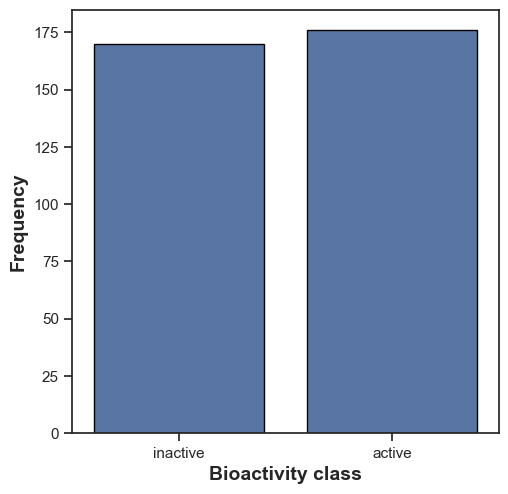

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

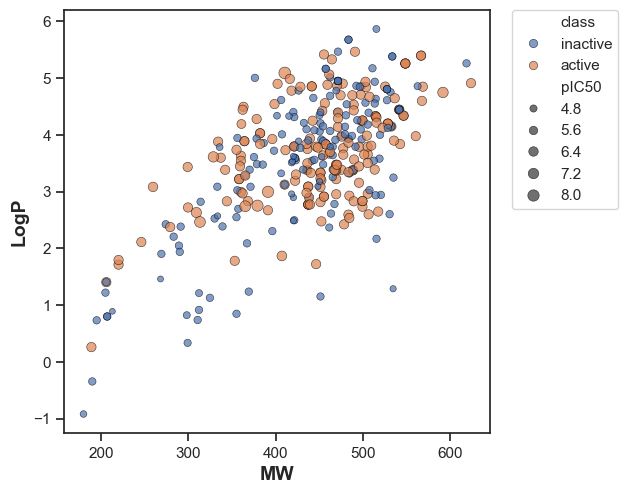

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

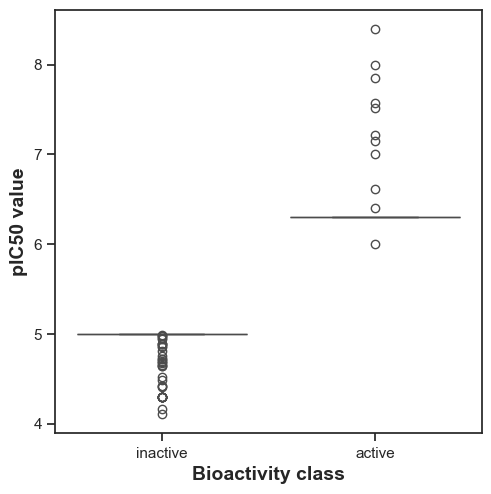

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='pIC50', data=df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [28]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.01
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,29920.0,1.837441e-69,0.01,Different distribution (reject H0)


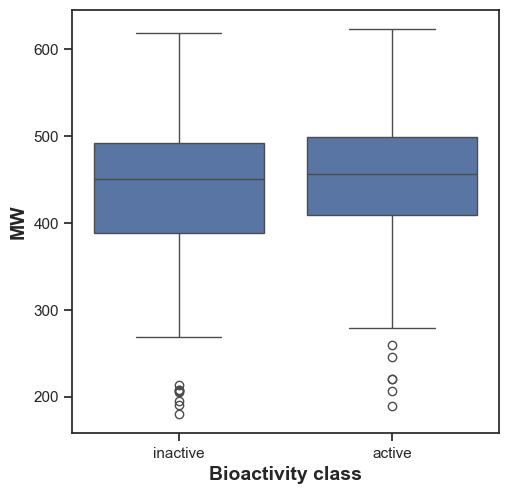

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [31]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,16222.5,0.174852,0.01,Same distribution (fail to reject H0)


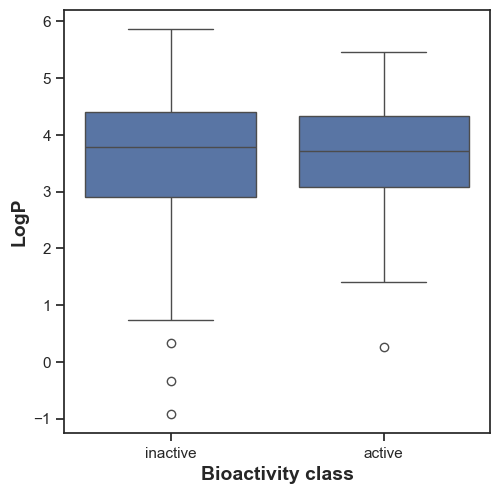

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [33]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,15036.5,0.934879,0.01,Same distribution (fail to reject H0)


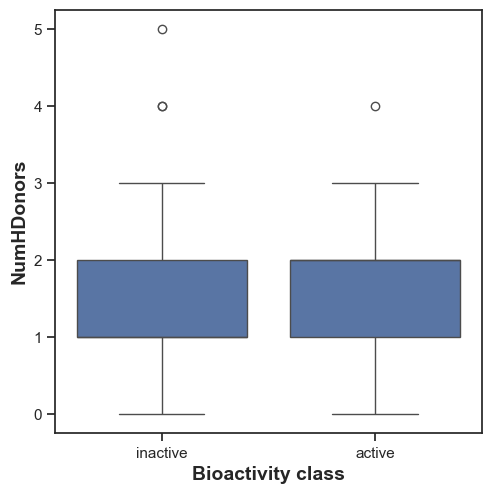

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [35]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,17720.5,0.000932,0.01,Different distribution (reject H0)


C:\Users\laksh\AppData\Local\Temp\ipykernel_28308\823815628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='NumHAcceptors', data=df_2class, palette=['#FF9999', '#66B2FF'])


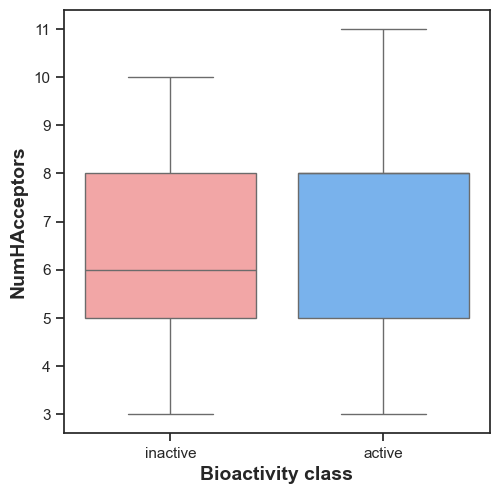

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='class', y='NumHAcceptors', data=df_2class, palette=['#FF9999', '#66B2FF'])


plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [37]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,18376.0,0.000192,0.01,Different distribution (reject H0)


In [38]:
! zip -r results.zip . -i *.csv *.pdf

'zip' is not recognized as an internal or external command,
operable program or batch file.
